# Requirements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import ast

# ► Entrega II -  

## Abstracto

- Este proyecto busca analizar el dataset de tráilers de películas y sus métricas de recepción en YouTube.
- En esta segunda parte se realiza una exploración de datos EDA para generar insights, formular hipótesis y proponer posibles modelos de predicción.

---

## Preguntas / Hipótesis

1. ¿Los tráilers con mayor número o proporción de comentarios positivos tienden a obtener mayor favorabilidad?
2. ¿El género de la película influye en la recepción del tráiler?
3. ¿Existe relación entre el presupuesto de la película y la favorabilidad en YouTube?
4. ¿El rating de la película está relacionada a la respuesta emocional del público?

## Objetivo

- Explorar las principales variables del dataset.
- Generar hipótesis basadas en los patrones observados.
- Proponer posibles modelos de Machine Learning.

## Contexto analítico

- El dataset incluye información de tráilers de películas, con variables relacionadas a la interacción en YouTube, contenidos en comentarios positivos, negativos, neutros.
- El dataset también cuenta con información de las películas género, rating, presupuesto, recaudación.

## Exploración de Datos (EDA)

In [3]:
# Load dataset from GitHub (processed)
url = "https://raw.githubusercontent.com/JotaNota/YoutubeTrailer_ML/main/data/processed/data_trailer_EDA_I.csv"
df_II = pd.read_csv(url)

df_II.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1105 non-null   object 
 1   trailer_link       1105 non-null   object 
 2   sentiment_scores   1105 non-null   object 
 3   favorability       1105 non-null   float64
 4   rating             1104 non-null   object 
 5   genre              1105 non-null   object 
 6   year               1105 non-null   int64  
 7   released           1105 non-null   object 
 8   votes              1105 non-null   float64
 9   director           1105 non-null   object 
 10  writer             1104 non-null   object 
 11  star               1105 non-null   object 
 12  country            1105 non-null   object 
 13  budget             901 non-null    float64
 14  gross              1105 non-null   float64
 15  company            1105 non-null   object 
 16  runtime            1104 

In [ ]:
df_II.info()

# Valores nulos
df_II.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1105 non-null   object 
 1   trailer_link       1105 non-null   object 
 2   sentiment_scores   1105 non-null   object 
 3   favorability       1105 non-null   float64
 4   rating             1104 non-null   object 
 5   genre              1105 non-null   object 
 6   year               1105 non-null   int64  
 7   released           1105 non-null   object 
 8   votes              1105 non-null   float64
 9   director           1105 non-null   object 
 10  writer             1104 non-null   object 
 11  star               1105 non-null   object 
 12  country            1105 non-null   object 
 13  budget             901 non-null    float64
 14  gross              1105 non-null   float64
 15  company            1105 non-null   object 
 16  runtime            1104 

,0
name,0
trailer_link,0
sentiment_scores,0
favorability,0
rating,1
genre,0
year,0
released,0
votes,0
director,0


In [ ]:
df_II.describe(include='all')

,name,trailer_link,sentiment_scores,favorability,rating,genre,year,released,votes,director,...,genre_Sci-Fi,genre_Thriller,rating_G,rating_NC-17,rating_Not Rated,rating_PG,rating_PG-13,rating_R,rating_TV-MA,rating_Unrated
count,1105,1105,1105,1105.000000,1104,1105,1105.000000,1105,1.105000e+03,1105,...,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000
unique,1054,1054,1015,NaN,8,13,NaN,767,NaN,772,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,The Girl with the Dragon Tattoo,https://www.youtube.com/watch?v=DqQe3OrsMKI,"{'positive': 0, 'neutral': 1, 'negative': 0}",NaN,R,Action,NaN,"September 16, 2005 (United States)",NaN,Ridley Scott,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4,4,4,NaN,544,296,NaN,5,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.679717,NaN,NaN,2010.043439,NaN,1.364592e+05,NaN,...,0.001810,0.000905,0.005430,0.001810,0.035294,0.082353,0.373756,0.492308,0.002715,0.005430
std,NaN,NaN,NaN,0.132921,NaN,NaN,6.095252,NaN,1.728636e+05,NaN,...,0.042524,0.030083,0.073521,0.042524,0.184606,0.275026,0.484019,0.500167,0.052058,0.073521
min,NaN,NaN,NaN,0.000000,NaN,NaN,1980.000000,NaN,3.360000e+02,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.610390,NaN,NaN,2007.000000,NaN,3.400000e+04,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,0.689655,NaN,NaN,2010.000000,NaN,7.300000e+04,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,0.760000,NaN,NaN,2014.000000,NaN,1.670000e+05,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000


### 📊 Distribución de comentarios
- La mayoría de los tráilers acumulan muchos comentarios positivos y neutros, mientras que los negativos son menos frecuentes.

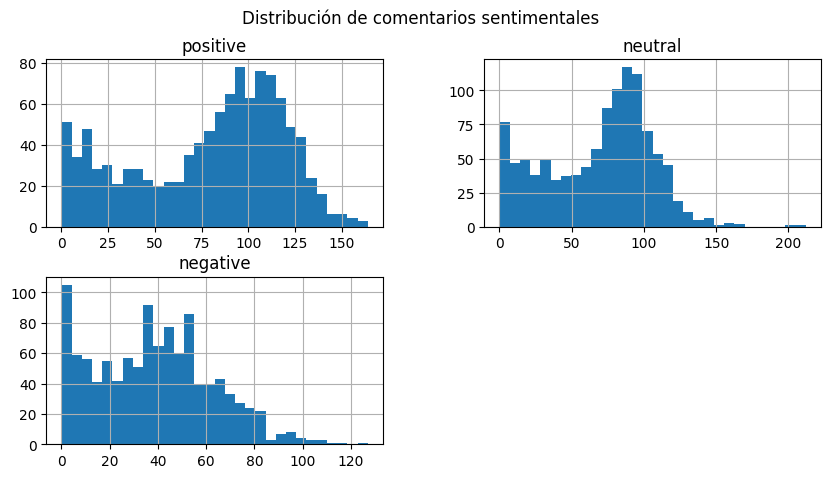

In [ ]:
# import matplotlib.pyplot as plt

# Distribución de variables sentimentales
df_II[['positive','neutral','negative']].hist(bins=30, figsize=(10,5))
plt.suptitle("Distribución de comentarios sentimentales")
plt.show()

### 📊 Comentarios positivos por género
- Los géneros Acción, Drama y Animación muestran medianas altas de comentarios positivos.
- En Comedia hay tráilers con muchos positivos, pero la dispersión es grande, algunos con muy pocos comentarios.

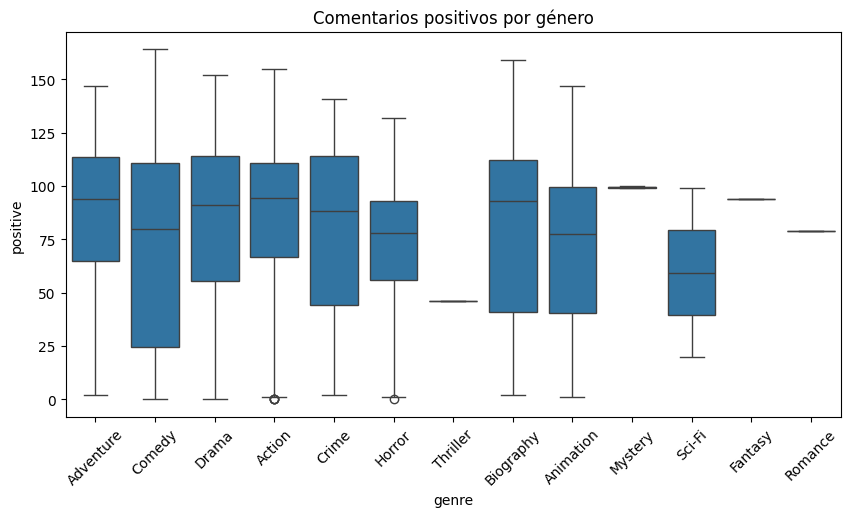

In [ ]:
# import seaborn as sns

plt.figure(figsize=(10,5))
sns.boxplot(x="genre", y="positive", data=df_II)
plt.xticks(rotation=45)
plt.title("Comentarios positivos por género")
plt.show()

### 📊 Presupuesto vs. proporción de comentarios positivos
- No existe una relación clara entre el presupuesto y la proporción de comentarios positivos.
- Películas de bajo y medio presupuesto pueden lograr alta favorabilidad en YouTube.
- El presupuesto alto no garantiza una recepción positiva mayor.

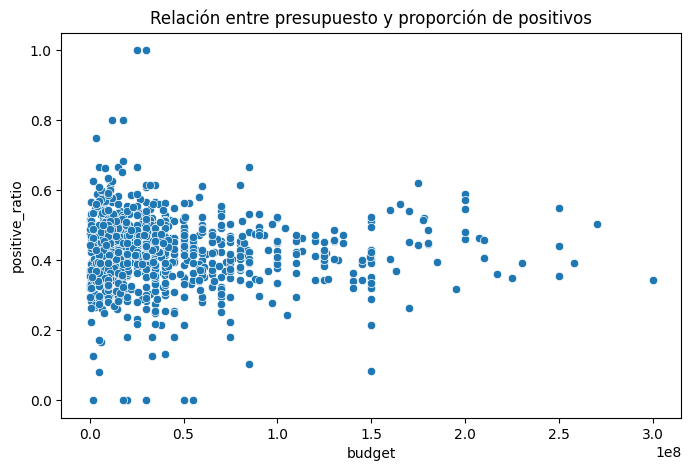

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="budget", y="positive_ratio", data=df_II)
plt.title("Relación entre presupuesto y proporción de positivos")
plt.show()

## Recomendaciones basadas en insights
- Acción y Comedia suelen recibir más comentarios positivos.  
- El presupuesto no garantiza alta favorabilidad.   

---

## Tipo de aprendizaje y modelos propuestos
Este es un problema de **aprendizaje supervisado**, donde buscamos predecir la favorabilidad `favorability`.  

**Modelos posibles:**  
- Regresión logística.  
- RandomForestClassifier.  
- Árbol de decisión.  

---
